# CSM148 Project 3

## Dataset Atribute Information

<ul>
    <li><b>id:</b> unique identifier</li>
    <li><b>gender:</b> "Male", "Female" or "Other"</li>
    <li><b>age:</b> age of the patient</li>
    <li><b>hypertension:</b> 0 if the patient doesn't have hypertension, 1 if the patient has hypertension</li>
    <li><b>heart_disease:</b> 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
    <li><b>ever_married</b> "No" or "Yes"</li>
    <li><b>work_type:</b> "children", "Govt_jov", "Never_worked","Private" or "Self-employed"</li>
    <li><b>Residence_type:</b> "Rural" or "Urban"</li>
    <li><b>avg_glucose_level:</b> average glucose level in blood</li>
    <li><b>bmi:</b> body mass index</li>
    <li><b>smoking_status:</b> "formerly smoked", "never smoked","smokes" or "Unknown"*)</li>
    <li><b>stroke:</b> 1 if the patient had a stroke or 0 if not</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from sklearn import metrics

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## 1. Load and View Data

In [3]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
y = dataset['stroke']
x = dataset.drop(['stroke', 'id'], axis=1)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


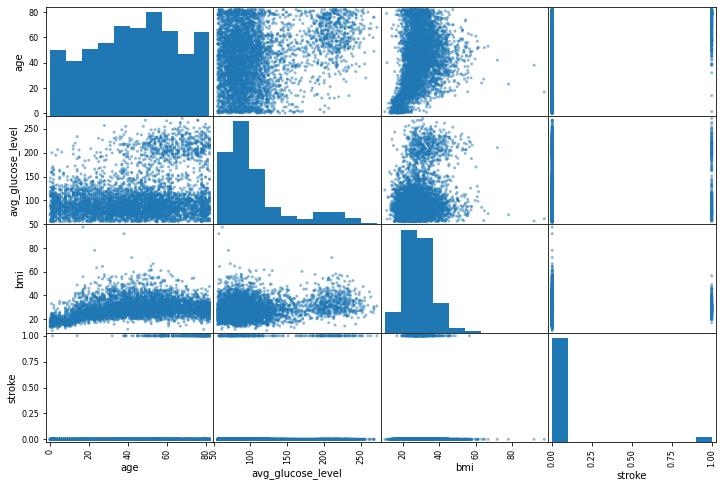

In [6]:
# correlation matrices of float features

from pandas.plotting import scatter_matrix


attributes = ["age", "avg_glucose_level", "bmi", "stroke"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

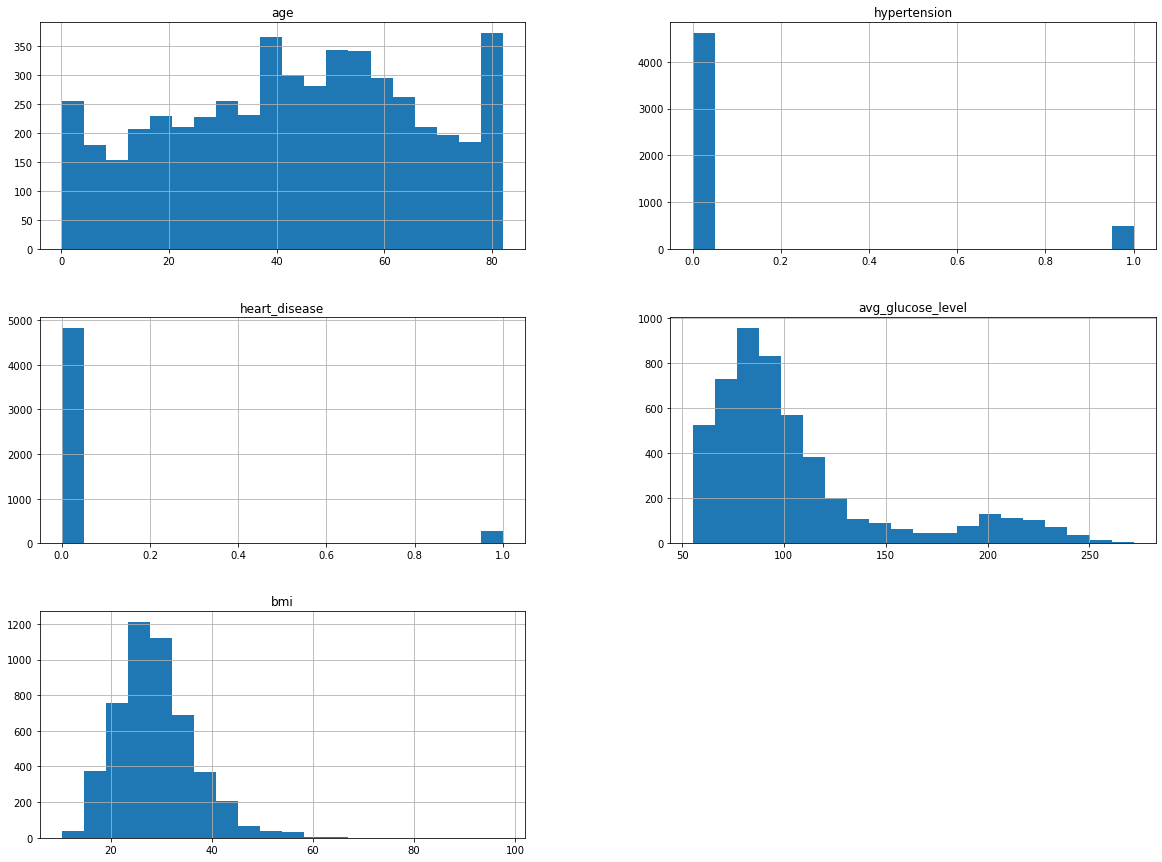

In [7]:
# histograms of all numeric features

x.hist(bins=20, figsize=(20,15))

<AxesSubplot:>

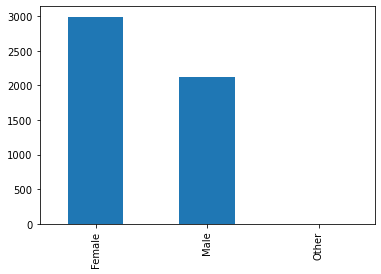

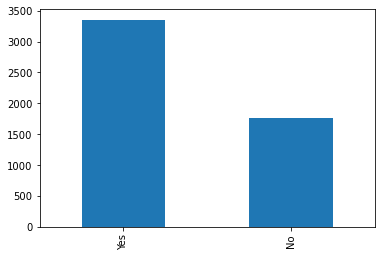

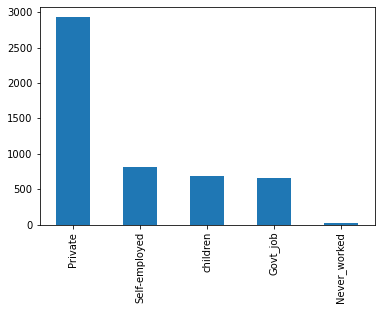

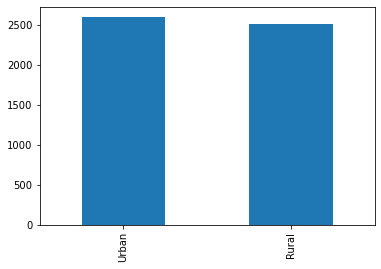

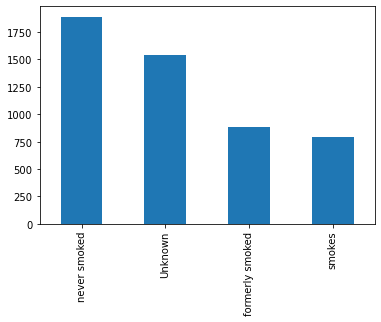

In [8]:
# bar graphs of all categorical features
# https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
x['gender'].value_counts().plot(kind='bar')
plt.figure()
x['ever_married'].value_counts().plot(kind='bar')
plt.figure()
x['work_type'].value_counts().plot(kind='bar')
plt.figure()
x['Residence_type'].value_counts().plot(kind='bar')
plt.figure()
x['smoking_status'].value_counts().plot(kind='bar')

## 2. Process Data

In [9]:
# 2d feature cross - divide avg_glucose_level by age

from sklearn.base import BaseEstimator, TransformerMixin

class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    '''
    def __init__(self): # nothing
        pass # https://stackoverflow.com/questions/42884795/python-empty-constructor
    
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        augmented_feature = X[:, feature2_idx] * X[:, feature1_idx]
        
        return np.c_[X, augmented_feature]

In [10]:
# 2b, 2c, 2e, 2f pipeline
# https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


# numeric pipeline
num_data = x.drop(['gender', 'ever_married', 'work_type', \
                   'Residence_type', 'smoking_status'], axis=1)

feature1_idx = num_data.columns.get_loc("age")
feature2_idx = num_data.columns.get_loc("bmi")

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', AugmentFeatures()),
    ('std_scaler', StandardScaler()),
])
data_num_tr = num_pipeline.fit_transform(num_data)

# convert ever_married, work_type, residence_type to one-hot encoding
# convert smoking_status to ordinal encoding
numeric = list(num_data)
one_hot = ['gender', 'work_type']
ordinal = ['ever_married', 'Residence_type']
smoke = ['smoking_status']
smoking_cat = ['never smoked', 'formerly smoked', 'smokes', 'Unknown']

# full pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric),
    ("onehot", OneHotEncoder(), one_hot),
    ("smoke", OrdinalEncoder(categories=[smoking_cat]), smoke),
    ("ord", OrdinalEncoder(), ordinal),
])
data_prepared = full_pipeline.fit_transform(x)

In [11]:
data_prepared[3]

array([ 0.25534165, -0.32860186, -0.2389468 ,  1.4373581 ,  0.71932748,
        0.50051201,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  2.        ,
        1.        ,  1.        ])

In [12]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( \
    data_prepared, y, test_size=0.2, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (y_train.sum())
print (y_test.sum())

(4088, 17) (4088,)
(1022, 17) (1022,)
195
54


In [14]:
# resample train data to be more balanced
# https://imbalanced-learn.org/stable/over_sampling.html
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print (X_train_res.shape, y_train_res.shape)
print (y_train_res.sum())

(7786, 17) (7786,)
3893


## 3. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg = LogisticRegression(random_state=0, max_iter=200)
logreg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=200, random_state=0)

test accuracy: 0.7661448140900196
test precision: 0.14285714285714285
test recall:  0.6851851851851852
test f1 score: 0.23642172523961658


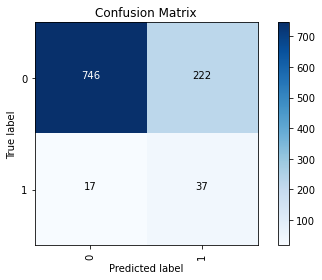

In [16]:
logreg_test_pred = logreg.predict(X_test)
logreg_test_acc = metrics.accuracy_score(y_test, logreg_test_pred)
logreg_test_prcn = metrics.precision_score(y_test, logreg_test_pred)
logreg_test_rec = metrics.recall_score(y_test, logreg_test_pred)
logreg_test_f1 = metrics.f1_score(y_test, logreg_test_pred)

print("test accuracy:", logreg_test_acc)
print("test precision:", logreg_test_prcn)
print("test recall: ", logreg_test_rec)
print("test f1 score:", logreg_test_f1)

draw_confusion_matrix(y_test, logreg_test_pred, [0,1])

In [17]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 2.16973757  0.06909032  0.09985982  0.18046883 -0.00796858 -0.15174391
   0.09132647 -0.05606128 -0.07059784  0.01556432 -0.15340938  0.84025246
   0.24231388 -0.98005393  0.0648718   0.15023827  0.21813058]]
[-2.40433169]


In [18]:
import statsmodels.api as sm

# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
data_stats = sm.OLS(y_train_res, X_train_res)
results_stats = data_stats.fit()

In [19]:
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     352.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:07:13   Log-Likelihood:                -3628.5
No. Observations:                7786   AIC:                             7289.
Df Residuals:                    7770   BIC:                             7400.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3540      0.024     14.582      0.0

## 4. PCA

In [20]:
# based on avocado lab

from sklearn import decomposition

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# fit to train data, transform test data to match
pca10 = decomposition.PCA(n_components=10)
X_train_res_pca10 = pca10.fit_transform(X_train_res)
X_test_pca10 = pca10.transform(X_test)

pca5 = decomposition.PCA(n_components=5)
X_train_res_pca5 = pca5.fit_transform(X_train_res)
X_test_pca5 = pca5.transform(X_test)

In [21]:
logreg_pca10 = LogisticRegression(random_state=0, max_iter=200)
logreg_pca10.fit(X_train_res_pca10, y_train_res)

LogisticRegression(max_iter=200, random_state=0)

test accuracy: 0.764187866927593
test precision: 0.1444866920152091
test recall:  0.7037037037037037
test f1 score: 0.2397476340694006


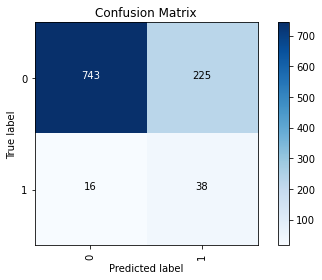

In [22]:
logreg_pca10_test_pred = logreg_pca10.predict(X_test_pca10)
logreg_pca10_test_acc = metrics.accuracy_score(y_test, logreg_pca10_test_pred)
logreg_pca10_test_prcn = metrics.precision_score(y_test, logreg_pca10_test_pred)
logreg_pca10_test_rec = metrics.recall_score(y_test, logreg_pca10_test_pred)
logreg_pca10_test_f1 = metrics.f1_score(y_test, logreg_pca10_test_pred)

print("test accuracy:", logreg_pca10_test_acc)
print("test precision:", logreg_pca10_test_prcn)
print("test recall: ", logreg_pca10_test_rec)
print("test f1 score:", logreg_pca10_test_f1)

draw_confusion_matrix(y_test, logreg_pca10_test_pred, [0,1])

In [23]:
logreg_pca5 = LogisticRegression(random_state=0, max_iter=200)
logreg_pca5.fit(X_train_res_pca5, y_train_res)

LogisticRegression(max_iter=200, random_state=0)

test accuracy: 0.7250489236790607
test precision: 0.13268608414239483
test recall:  0.7592592592592593
test f1 score: 0.22589531680440772


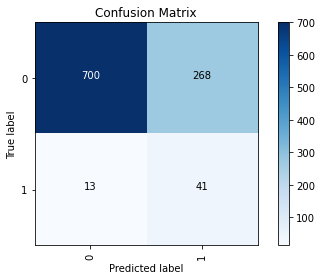

In [24]:
logreg_pca5_test_pred = logreg_pca5.predict(X_test_pca5)
logreg_pca5_test_acc = metrics.accuracy_score(y_test, logreg_pca5_test_pred)
logreg_pca5_test_prcn = metrics.precision_score(y_test, logreg_pca5_test_pred)
logreg_pca5_test_rec = metrics.recall_score(y_test, logreg_pca5_test_pred)
logreg_pca5_test_f1 = metrics.f1_score(y_test, logreg_pca5_test_pred)

print("test accuracy:", logreg_pca5_test_acc)
print("test precision:", logreg_pca5_test_prcn)
print("test recall: ", logreg_pca5_test_rec)
print("test f1 score:", logreg_pca5_test_f1)

draw_confusion_matrix(y_test, logreg_pca5_test_pred, [0,1])

## 5. Ensemble Method (Bagging)

In [25]:
# based on DT_RF lab

from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor


ntrees = 500
estimators = []
R2s = []
yhats_test = np.zeros((X_test.shape[0], ntrees))
importance = np.zeros((X_test.shape[1], ntrees))

for i in range(ntrees):
    simpletree = DecisionTreeRegressor(max_depth=3)
    bootstrap_x, bootstrap_y = resample(X_train_res, y_train_res)
    estimators = np.append(estimators, simpletree.fit(bootstrap_x, bootstrap_y))
    R2s = np.append(R2s, simpletree.score(X_test, y_test))
    yhats_test[:,i] = simpletree.predict(X_test)
    importance[:,i] = simpletree.feature_importances_

In [26]:
print(importance.shape)
print(importance.mean(axis=1))

(17, 500)
[8.75605228e-01 0.00000000e+00 8.40486384e-05 1.06653654e-04
 1.63306462e-04 3.29531027e-03 1.23651933e-03 1.59789075e-03
 0.00000000e+00 2.20059919e-02 0.00000000e+00 3.40250861e-02
 8.24138284e-04 0.00000000e+00 1.05374323e-02 9.39105476e-04
 4.95792893e-02]


mean r2 score: -2.238084343113069
test accuracy: 0.7475538160469667
test precision: 0.13309352517985612
test recall:  0.6851851851851852
test f1 score: 0.22289156626506026


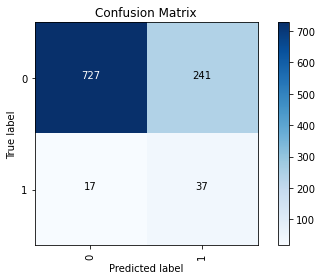

In [27]:
# https://stackoverflow.com/questions/46994426/how-to-round-a-numpy-array
mean_yhats = np.round(yhats_test.mean(axis=1))

bag_test_acc = metrics.accuracy_score(y_test, mean_yhats)
bag_test_prcn = metrics.precision_score(y_test, mean_yhats)
bag_test_rec = metrics.recall_score(y_test, mean_yhats)
bag_test_f1 = metrics.f1_score(y_test, mean_yhats)

print("mean r2 score:", R2s.mean())
print("test accuracy:", bag_test_acc)
print("test precision:", bag_test_prcn)
print("test recall: ", bag_test_rec)
print("test f1 score:", bag_test_f1)

draw_confusion_matrix(y_test, mean_yhats, [0,1])

mean r2 score: -2.238084343113069
test accuracy: 0.7475538160469667
test precision: 0.13309352517985612
test recall:  0.6851851851851852
test f1 score: 0.22289156626506026


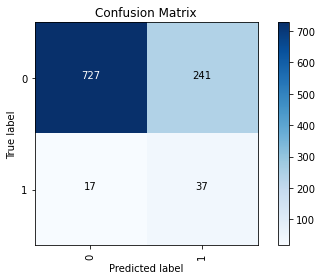

In [28]:
# https://stackoverflow.com/questions/46994426/how-to-round-a-numpy-array
median_yhats = np.round(yhats_test.mean(axis=1))

bag_test_acc = metrics.accuracy_score(y_test, median_yhats)
bag_test_prcn = metrics.precision_score(y_test, median_yhats)
bag_test_rec = metrics.recall_score(y_test, median_yhats)
bag_test_f1 = metrics.f1_score(y_test, median_yhats)

print("mean r2 score:", R2s.mean())
print("test accuracy:", bag_test_acc)
print("test precision:", bag_test_prcn)
print("test recall: ", bag_test_rec)
print("test f1 score:", bag_test_f1)

draw_confusion_matrix(y_test, median_yhats, [0,1])

## 6. Neural Net

In [42]:
# based on mnist lab

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [43]:
# https://stackoverflow.com/questions/41924453/pytorch-how-to-use-dataloaders-for-custom-datasets

from torch.utils.data import TensorDataset, DataLoader

print(dataset.shape)
train_size = int(0.8 * dataset.shape[0])

train_nn = dataset[:train_size]
test_nn = dataset[train_size:]
print(train_nn.shape)

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.IntTensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.IntTensor(y_test.values)
# i have no clue why only y_test is a series while the rest are arrays

train_nn = TensorDataset(X_train_tensor, y_train_tensor)
test_nn = TensorDataset(X_test_tensor, y_test_tensor)
print(train_nn)

(5110, 12)
(4088, 12)


In [44]:
train_loader = torch.utils.data.DataLoader(train_nn)
test_loader = torch.utils.data.DataLoader(test_nn)

for batch_idx, (data, target) in enumerate(train_loader):
    print(data.shape)
    print(target.shape)
    break

torch.Size([1, 17])
torch.Size([1])


In [45]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(17, 500)
        self.fc2 = nn.Linear(500, 1)

    def forward(self, x):
        h = F.relu(self.fc(x.float()))
        h = self.fc2(h)
        return torch.sigmoid(h)    
    
#initialize the model   
network = Model()

#initialize the optimizer   
learning_rate = 0.01
momentum = 0.5
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [46]:
n_epochs = 3
train_losses = []
train_counter = []
test_losses = []
test_acc = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
log_interval = 100

In [47]:
# https://stackoverflow.com/questions/53628622/loss-function-its-inputs-for-binary-classification-pytorch
# https://medium.com/analytics-vidhya/simple-neural-network-with-bceloss-for-binary-classification-for-a-custom-dataset-8d5c69ffffee
criterion = nn.BCELoss()

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
        
    output = network(data.float())
    loss = criterion(output, target.float().unsqueeze(1))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss))
      train_losses.append(loss)
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [48]:
criterion = nn.BCELoss()

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
        
      output = network(data.float())
      loss = criterion(output, target.float().unsqueeze(1))
      test_loss += loss
    
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
    
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_acc.append(correct / len(test_loader.dataset))
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [49]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 0.7080, Accuracy: 968/1022 (95%)

Train Epoch: 1 [0/4088 (0%)]	Loss: 0.682846
Train Epoch: 1 [100/4088 (2%)]	Loss: 0.018011
Train Epoch: 1 [200/4088 (5%)]	Loss: 0.062086
Train Epoch: 1 [300/4088 (7%)]	Loss: 0.007422
Train Epoch: 1 [400/4088 (10%)]	Loss: 0.046230
Train Epoch: 1 [500/4088 (12%)]	Loss: 0.011273
Train Epoch: 1 [600/4088 (15%)]	Loss: 0.020053
Train Epoch: 1 [700/4088 (17%)]	Loss: 0.002303
Train Epoch: 1 [800/4088 (20%)]	Loss: 0.015782
Train Epoch: 1 [900/4088 (22%)]	Loss: 0.001073
Train Epoch: 1 [1000/4088 (24%)]	Loss: 0.010396
Train Epoch: 1 [1100/4088 (27%)]	Loss: 2.197992
Train Epoch: 1 [1200/4088 (29%)]	Loss: 0.096887
Train Epoch: 1 [1300/4088 (32%)]	Loss: 0.230187
Train Epoch: 1 [1400/4088 (34%)]	Loss: 0.032401
Train Epoch: 1 [1500/4088 (37%)]	Loss: 0.009162
Train Epoch: 1 [1600/4088 (39%)]	Loss: 4.545251
Train Epoch: 1 [1700/4088 (42%)]	Loss: 0.178897
Train Epoch: 1 [1800/4088 (44%)]	Loss: 0.199744
Train Epoch: 1 [1900/4088 (46%)]	Loss: 0.002843


In [50]:
print(len(test_losses))
print(test_losses)

4
[tensor(0.7080), tensor(0.1963), tensor(0.1930), tensor(0.1906)]


## 7. K-fold Cross Validation (Bagging)

In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

from sklearn.model_selection import StratifiedShuffleSplit

ntrees = 500
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_acc = []
cv_pre = []
cv_rec = []
cv_f1 = []

for train_index, test_index in sss.split(X_train_res, y_train_res):
    X_train_cv, X_test_cv = X_train_res[train_index], X_train_res[test_index]
    y_train_cv, y_test_cv = y_train_res[train_index], y_train_res[test_index]
    
    estimators = []
    R2s = []
    yhats_test = np.zeros((X_test.shape[0], ntrees))
    for i in range(ntrees):
        simpletree = DecisionTreeRegressor(max_depth=3)
        bootstrap_x, bootstrap_y = resample(X_train_cv, y_train_cv)
        estimators = np.append(estimators, simpletree.fit(bootstrap_x, bootstrap_y))
        R2s = np.append(R2s, simpletree.score(X_test, y_test))
        yhats_test[:,i] = simpletree.predict(X_test)
    
    median_yhats = np.round(np.median(yhats_test, axis=1))
    bag_test_acc = metrics.accuracy_score(y_test, median_yhats)
    bag_test_prcn = metrics.precision_score(y_test, median_yhats)
    bag_test_rec = metrics.recall_score(y_test, median_yhats)
    bag_test_f1 = metrics.f1_score(y_test, median_yhats)
    
    cv_acc.append(bag_test_acc)
    cv_pre.append(bag_test_prcn)
    cv_rec.append(bag_test_rec)
    cv_f1.append(bag_test_f1)
    
    print("mean r2 score:", R2s.mean())
    print("test accuracy:", bag_test_acc)
    print("test precision:", bag_test_prcn)
    print("test recall: ", bag_test_rec)
    print("test f1 score:", bag_test_f1)
    print()

mean r2 score: -2.1638741032232915
test accuracy: 0.7514677103718199
test precision: 0.13768115942028986
test recall:  0.7037037037037037
test f1 score: 0.23030303030303031

mean r2 score: -2.2744742369944517
test accuracy: 0.7544031311154599
test precision: 0.13653136531365315
test recall:  0.6851851851851852
test f1 score: 0.2276923076923077

mean r2 score: -2.226301032621165
test accuracy: 0.7514677103718199
test precision: 0.1323529411764706
test recall:  0.6666666666666666
test f1 score: 0.22085889570552147

mean r2 score: -2.160875388216152
test accuracy: 0.7583170254403131
test precision: 0.13026819923371646
test recall:  0.6296296296296297
test f1 score: 0.21587301587301586

mean r2 score: -2.3286665558762465
test accuracy: 0.761252446183953
test precision: 0.14015151515151514
test recall:  0.6851851851851852
test f1 score: 0.23270440251572327



In [52]:
print("average cross validation scores")
print("mean test accuracy:", np.mean(cv_acc))
print("mean test precision:", np.mean(cv_pre))
print("mean test recall:", np.mean(cv_rec))
print("mean test f1 score:", np.mean(cv_f1))

average cross validation scores
mean test accuracy: 0.7553816046966731
mean test precision: 0.13539703605912903
mean test recall: 0.674074074074074
mean test f1 score: 0.2254863304179197


## 7. K-fold Cross Validation (NN)

In [53]:
n_epochs = 3
train_losses = []
train_counter = []
test_losses = []
test_acc = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
log_interval = 1000


for train_index, test_index in sss.split(X_train_res, y_train_res):
    X_train_cv, X_test_cv = X_train_res[train_index], X_train_res[test_index]
    y_train_cv, y_test_cv = y_train_res[train_index], y_train_res[test_index]
    
    X_train_tensor = torch.tensor(X_train_cv)
    y_train_tensor = torch.IntTensor(y_train_cv.values)
    X_test_tensor = torch.tensor(X_test_cv)
    y_test_tensor = torch.IntTensor(y_test_cv.values)
    # still have no clue why some of these are series while the rest are arrays

    train_nn = TensorDataset(X_train_tensor, y_train_tensor)
    test_nn = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = torch.utils.data.DataLoader(train_nn)
    test_loader = torch.utils.data.DataLoader(test_nn)

    for epoch in range(1, n_epochs + 1):
      train(epoch)
      test()

Train Epoch: 1 [0/6228 (0%)]	Loss: 1.663520
Train Epoch: 1 [1000/6228 (16%)]	Loss: 0.270739
Train Epoch: 1 [2000/6228 (32%)]	Loss: 0.635053
Train Epoch: 1 [3000/6228 (48%)]	Loss: 0.166337
Train Epoch: 1 [4000/6228 (64%)]	Loss: 0.182555
Train Epoch: 1 [5000/6228 (80%)]	Loss: 0.922878
Train Epoch: 1 [6000/6228 (96%)]	Loss: 0.416058

Test set: Avg. loss: 0.3822, Accuracy: 779/1558 (50%)

Train Epoch: 2 [0/6228 (0%)]	Loss: 0.181292
Train Epoch: 2 [1000/6228 (16%)]	Loss: 0.246902
Train Epoch: 2 [2000/6228 (32%)]	Loss: 0.444232
Train Epoch: 2 [3000/6228 (48%)]	Loss: 0.137003
Train Epoch: 2 [4000/6228 (64%)]	Loss: 0.137142
Train Epoch: 2 [5000/6228 (80%)]	Loss: 0.890322
Train Epoch: 2 [6000/6228 (96%)]	Loss: 0.345558

Test set: Avg. loss: 0.3578, Accuracy: 779/1558 (50%)

Train Epoch: 3 [0/6228 (0%)]	Loss: 0.165411
Train Epoch: 3 [1000/6228 (16%)]	Loss: 0.220705
Train Epoch: 3 [2000/6228 (32%)]	Loss: 0.291168
Train Epoch: 3 [3000/6228 (48%)]	Loss: 0.105031
Train Epoch: 3 [4000/6228 (64%)]	Los

In [54]:
print("mean test accuracy", np.mean(test_acc))

mean test accuracy 0.5


## 8. Other Models - SVM

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

svm = make_pipeline(SVC(probability=True))
svm.fit(X_train_res, y_train_res)

Pipeline(steps=[('svc', SVC(probability=True))])

test accuracy: 0.7925636007827789
test precision: 0.1504424778761062
test recall:  0.6296296296296297
test f1 score: 0.24285714285714288


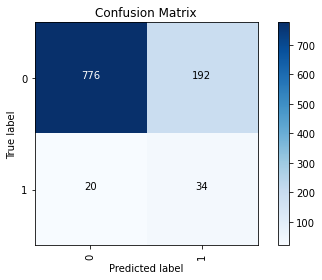

In [56]:
svm_test_pred = svm.predict(X_test)
svm_test_acc = metrics.accuracy_score(y_test, svm_test_pred)
svm_test_prcn = metrics.precision_score(y_test, svm_test_pred)
svm_test_rec = metrics.recall_score(y_test, svm_test_pred)
svm_test_f1 = metrics.f1_score(y_test, svm_test_pred)

print("test accuracy:", svm_test_acc)
print("test precision:", svm_test_prcn)
print("test recall: ", svm_test_rec)
print("test f1 score:", svm_test_f1)

draw_confusion_matrix(y_test, svm_test_pred, [0,1])

test accuracy: 0.7191780821917808
test precision: 0.13249211356466878
test recall:  0.7777777777777778
test f1 score: 0.22641509433962267


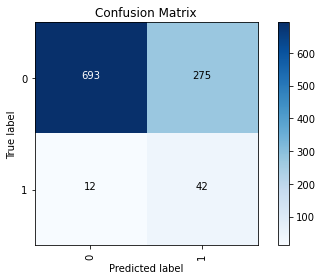

In [58]:
svm = make_pipeline(SVC(probability=True))
svm.fit(X_train_res_pca5, y_train_res)

svm_test_pred = svm.predict(X_test_pca5)
svm_test_acc = metrics.accuracy_score(y_test, svm_test_pred)
svm_test_prcn = metrics.precision_score(y_test, svm_test_pred)
svm_test_rec = metrics.recall_score(y_test, svm_test_pred)
svm_test_f1 = metrics.f1_score(y_test, svm_test_pred)

print("test accuracy:", svm_test_acc)
print("test precision:", svm_test_prcn)
print("test recall: ", svm_test_rec)
print("test f1 score:", svm_test_f1)

draw_confusion_matrix(y_test, svm_test_pred, [0,1])